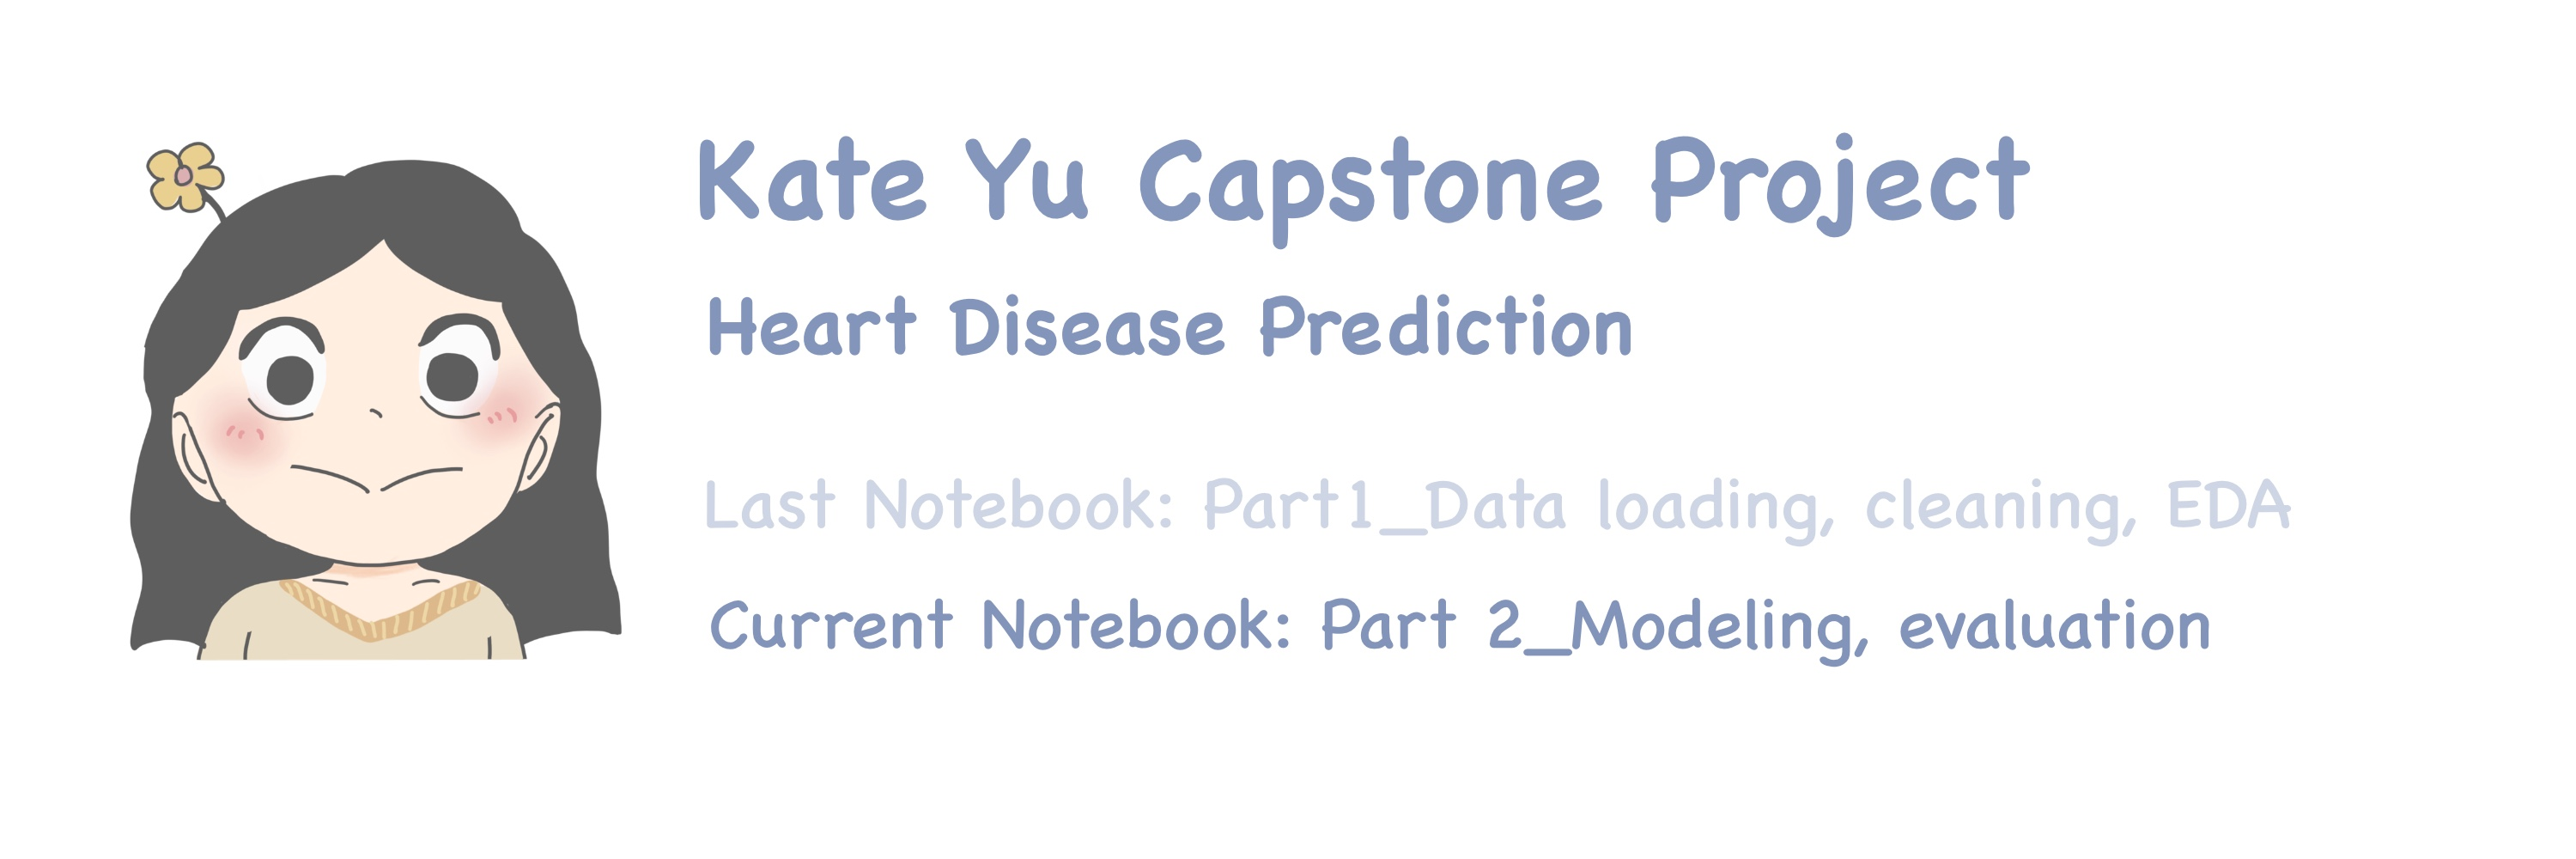

## Table of Content
1. [Load Dataset](#loa)

2. [Model Fitting](#mod)

    2.1 [logistic Regression](#a)
    
    2.2 [Logistic Regression + PCA](#b)
    
    2.3 [Logistic Regression + SMOTE](#c)
    
    2.4 [Logistic Regression + UnderSampling](#d)
    
    2.5 [Logistic Regression + GridSearch](#e)
    
    2.6 [Decision Tree](#f)
    
    2.7 [Random Forest](#g)
    
    2.8 [K Nearest Neigbours](#h)
    
3. [Summarize Evaluation Scores](#sum)

# Load Dataset
<a id='loa'></a>

In [1]:
# the data science trinity
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn
import seaborn as sns

# model selection tools
from sklearn.model_selection import train_test_split

# scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# linear models
from sklearn.linear_model import LogisticRegression

# metrics 
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, accuracy_score


# no warning message
pd.options.mode.chained_assignment = None

In [2]:
# load cleaned dataset
df_clean = pd.read_csv('cleaned_dataset.csv')

In [3]:
df_clean.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,Asthma,KidneyDisease,SkinCancer,HeartDisease,Age,Diabetic,GenHealth,Race
0,16.60,3,30,5,1,1,0,0,0,1,1,0,1,0,55,1,3,White
1,20.34,0,0,7,1,0,0,1,0,1,0,0,0,0,80,0,3,White
2,26.58,20,30,8,0,1,0,0,0,1,1,0,0,0,65,1,1,White
3,24.21,0,0,6,1,0,0,0,0,0,0,0,1,0,75,0,2,White
4,23.71,28,0,8,1,0,0,0,1,1,0,0,0,0,40,0,3,White


## Convert Multi-class Variable into Numeric

In [4]:
dummy = pd.get_dummies(df_clean["Race"], drop_first=True)
df_clean = pd.concat([df_clean,dummy],axis=1)
del df_clean["Race"]

In [5]:
# sanity check
df_clean.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,...,SkinCancer,HeartDisease,Age,Diabetic,GenHealth,Asian,Black,Hispanic,Other,White
0,16.60,3,30,5,1,1,0,0,0,1,...,1,0,55,1,3,0,0,0,0,1
1,20.34,0,0,7,1,0,0,1,0,1,...,0,0,80,0,3,0,0,0,0,1
2,26.58,20,30,8,0,1,0,0,0,1,...,0,0,65,1,1,0,0,0,0,1
3,24.21,0,0,6,1,0,0,0,0,0,...,1,0,75,0,2,0,0,0,0,1
4,23.71,28,0,8,1,0,0,0,1,1,...,0,0,40,0,3,0,0,0,0,1


In [6]:
# check final column names
df_clean.columns

Index(['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime', 'Sex', 'Smoking',
       'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease', 'Age',
       'Diabetic', 'GenHealth', 'Asian', 'Black', 'Hispanic', 'Other',
       'White'],
      dtype='object')

# Model Fitting
<a id='mod'></a>

### Split Training and Testing Datasets

In [7]:
# list the percentage of people who have/ not have heart disease
df_clean['HeartDisease'].value_counts(normalize=True)

0    0.914405
1    0.085595
Name: HeartDisease, dtype: float64

**NOTE:** 8.5% people have heart disease in the dataset, so the data is heavily imbalanced, should not only care about accuracy while modeling, but also recall and precision

In [8]:
# Assigning our features to X 
X = df_clean.drop(['HeartDisease'], axis=1)

# Assigning our target to y 
y = df_clean['HeartDisease']

In [9]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [10]:
X.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Sex,Smoking,AlcoholDrinking,Stroke,DiffWalking,PhysicalActivity,...,KidneyDisease,SkinCancer,Age,Diabetic,GenHealth,Asian,Black,Hispanic,Other,White
0,16.60,3,30,5,1,1,0,0,0,1,...,0,1,55,1,3,0,0,0,0,1
1,20.34,0,0,7,1,0,0,1,0,1,...,0,0,80,0,3,0,0,0,0,1
2,26.58,20,30,8,0,1,0,0,0,1,...,0,0,65,1,1,0,0,0,0,1
3,24.21,0,0,6,1,0,0,0,0,0,...,0,1,75,0,2,0,0,0,0,1
4,23.71,28,0,8,1,0,0,0,1,1,...,0,0,40,0,3,0,0,0,0,1


In [11]:
# check the shape of inividual dataset
print(f'The shape of X_train is {X_train.shape}')
print(f'The shape of y_train is {y_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of y_test is {y_test.shape}')

The shape of X_train is (255836, 21)
The shape of y_train is (255836,)
The shape of X_test is (63959, 21)
The shape of y_test is (63959,)


**NOTE:** We have 21 features as independent variables, and 1 dependent variable

## Pipeline

In [12]:
# import packages
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,plot_confusion_matrix

In [13]:
# create empty lists to store each score from each model
precision = []
recall = []
accuracy = []
f1 =[]

### Logistic Regression
<a id='a'></a>

First, I tried Logistic Regression with basic setting with standard scaling, in order to get a basic model result

In [14]:
from sklearn.linear_model import LogisticRegression

# set up pipeline
estimators = [
    ('scale', StandardScaler()),
    ('logistic', LogisticRegression()) 
]

pipe = Pipeline(estimators)

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58484
           1       0.56      0.12      0.19      5475

    accuracy                           0.92     63959
   macro avg       0.74      0.55      0.57     63959
weighted avg       0.89      0.92      0.89     63959



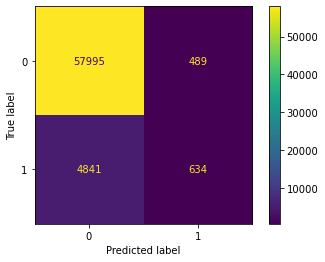

In [15]:
# fit data into pipeline
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(pipe,X_test, y_test)

In [16]:
# keep track of evaluation scores
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
accuracy.append(accuracy_score(y_test, y_pred))

**NOTE:**
- The model has pretty high accuracy score which is great!
- BUT the recall is super low, which means there are a lot False Negative results (people who do have heart disease but classified as not)
- Therefore, increasing recall score is an important task in the following modeling process

### Logistic Regression with PCA
<a id='b'></a>

Next, I tried PCA (Principal Component Analysis) after scaling in order to reducing the dimensionality of features and reduce noise

In [17]:
from sklearn.decomposition import PCA

estimators = [
    ('scale', StandardScaler()),
    ('reduce_dim', PCA(n_components=5)),
    ('logistic', LogisticRegression()) 
]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('reduce_dim', PCA(n_components=5)),
                ('logistic', LogisticRegression())])

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58484
           1       0.50      0.09      0.16      5475

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.56     63959
weighted avg       0.89      0.91      0.89     63959



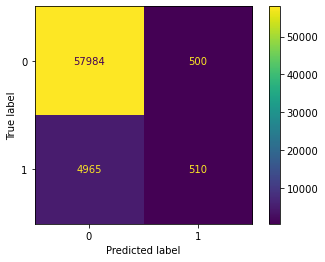

In [18]:
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(pipe,X_test, y_test)

In [19]:
# keep track of evaluation scores
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
accuracy.append(accuracy_score(y_test, y_pred))

**NOTE:**
- There is no obvious change after applying PCA
- It seems there is a bigger issue with these basic modeling

### Logistic Regression with SMOTE
<a id='c'></a>

Since the dataset is very imbalanced, so there is not enough result have heart disease as 1, so oversampling technique SMOTE has been used to make a balanced dataset

In [20]:
from imblearn.over_sampling import SMOTE

# instantiate SMOTE sampler, fit it to the training data, then resample the data
X_train_sm, y_train_sm = SMOTE().fit_resample(X_train, y_train)

In [21]:
# set up pipeline
estimators = [
    ('scale', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=500)) 
]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=500))])

              precision    recall  f1-score   support

           0       0.95      0.81      0.88     58484
           1       0.22      0.58      0.32      5475

    accuracy                           0.79     63959
   macro avg       0.59      0.69      0.60     63959
weighted avg       0.89      0.79      0.83     63959



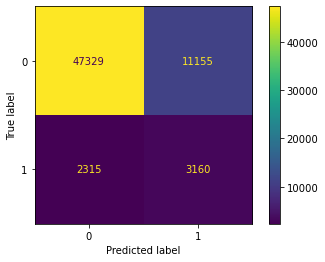

In [22]:
# fit trainning data and predict
pipe.fit(X_train_sm, y_train_sm)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(pipe,X_test, y_test)

In [23]:
# keep track of evaluation scores
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
accuracy.append(accuracy_score(y_test, y_pred))

**NOTE:**
- Recall score increased significantly!! Less people who might have heart disease has been predicted as heart disease correctly
- However increasing recall score seems sacrifice the accuracy and precision
- I think recall is more important in this project, because **the goal of this prediction process is to increase people's awareness of possibility of getting heart disease so that people can do some prevention actions to improve their health condition**
- In following modeling process, I will focus to increase F1 score because it reflect the overall performance and balance of precision and recall

### Logistic Regression with Undersampling
<a id='d'></a>

Under sampling is another technique to deal with imbalanced dataset, the result will be compared with SMOTE

In [24]:
from imblearn.under_sampling import RandomUnderSampler

# instantiate under sampler, fit it to the training data, then resample the data
X_train_us, y_train_us = RandomUnderSampler(sampling_strategy="majority").fit_resample(X_train, y_train)

In [25]:
# set up pipeline
estimators = [
    ('scale', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=200)) 
]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('logistic', LogisticRegression(max_iter=200))])

              precision    recall  f1-score   support

           0       0.97      0.75      0.84     58484
           1       0.22      0.77      0.34      5475

    accuracy                           0.75     63959
   macro avg       0.60      0.76      0.59     63959
weighted avg       0.91      0.75      0.80     63959



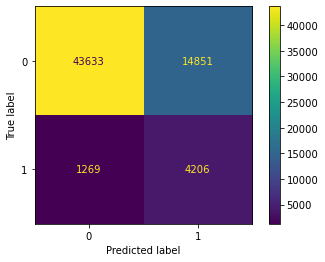

In [26]:
# fit trainning data and predict
pipe.fit(X_train_us, y_train_us)
y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))
plot_confusion_matrix(pipe,X_test, y_test)

In [27]:
# keep track of evaluation scores
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
accuracy.append(accuracy_score(y_test, y_pred))

**NOTE:**
- Accuracy of this model decreased compared to SMOTE, but recall increased up to another level, will continuous using under sampling in following models
- F1 score is increased slightly as well
- Will keep optimize this model

#### Predict Possibility

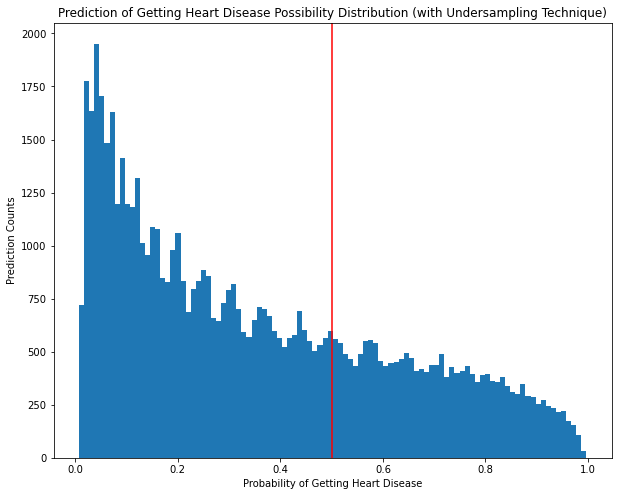

In [28]:
# check overall prediction distribution
plt.figure(figsize=(10,8))
plt.hist(pipe.predict_proba(X_test)[:,1],bins=100)
plt.axvline(x=0.5, color='red')

plt.title('Prediction of Getting Heart Disease Possibility Distribution (with Undersampling Technique)')
plt.xlabel('Probability of Getting Heart Disease')
plt.ylabel('Prediction Counts')
plt.show()

**NOTE:** As we can see the predict distribution, most points in test dataset have been predicted below 0.5, which is 0 as a final result. Majority probability of getting heart disease is below 20%.

#### Check Odds Ratio

In [29]:
# calculate the odds ratrio from coefficient
log_odds = np.exp(pipe.named_steps['logistic'].coef_[0])

# show odd ratio in a table
log_cof_df = pd.DataFrame(log_odds, X_train.columns,columns=['odds_ratio']) .sort_values(by='odds_ratio', ascending=False)
log_cof_df

,odds_ratio
Age,2.747426
Stroke,1.426748
Diabetic,1.217787
Smoking,1.201568
KidneyDisease,1.162105
Asthma,1.122285
DiffWalking,1.115978
BMI,1.056150
MentalHealth,1.052477
SkinCancer,1.045126


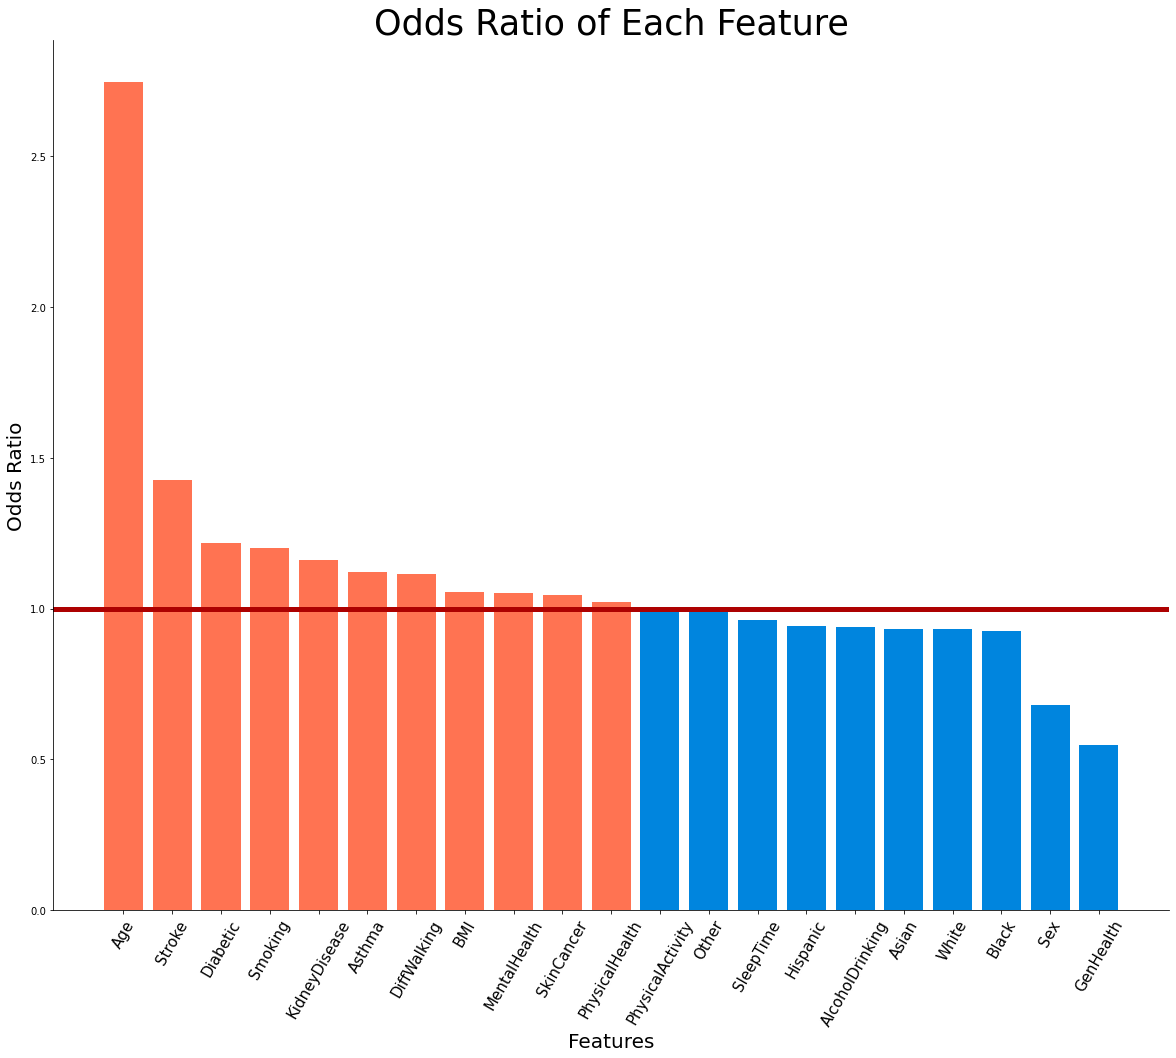

In [30]:
# set up a color pallete based on positive or negative correlation
color=[]
for i in range(21):
    if log_cof_df.iloc[i,0] > 1:
        color.append('#ff7352ff')
    else:
        color.append('#0085deff')
        
plt.figure(figsize=(20,16))
plt.bar(log_cof_df.index, log_cof_df['odds_ratio'], color=color)

# add a seperation line
plt.axhline(y=1, color='#ad0101ff',linewidth=5)
plt.title('Odds Ratio of Each Feature', fontsize=35)
plt.xlabel('Features', fontsize=20)
plt.xticks(rotation= 60, fontsize=15)
plt.ylabel('Odds Ratio', fontsize=20)
sns.despine()

# plt.savefig('a.png',transparent=True)

plt.show()

**NOTE:**
- Odds ratio here represents the odds that heart disease will occur with a feature exposure, compared to the odds of heart disease occurring in the absence of that feature.
- Put it into a simple way, higher odds ratio means higher possibility seeing heart disease. All features with values >1 means it increase the possibility of seeing heart disease.
- e.g. increase 1 year in age, the odds of seeing heart disease increase by a factor of 2.65
- In summary, top odds ratio features are:
    1. Age
    2. Stroke
    3. Diabetic
    4. Smoking
    5. Kidney Disease

### Logistic Regression with Undersampling & GridSearch
<a id='e'></a>

Until now, the best model is logistic regression with under sampling, so I want to step further from here and using grid search to find the best hyper parameters for this model, these following steps have been optimized:
- Scaling
- PCA
- Logistic regression

In [31]:
from sklearn.model_selection import GridSearchCV

# estimators
estimators = [
    ('scaling', StandardScaler()),
    ('reduce_dim', PCA()),
    ('model', LogisticRegression())
]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

# define parameter grid
param_grid = [
    
    # logistic regression with L1 regularization
    {
        'scaling': [MinMaxScaler(), StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [5, 6, 7, 8, 9, 10],
        'model': [LogisticRegression()],
        'model__penalty': ['l1'],
        'model__solver': ['liblinear'],
        'model__C': np.logspace(-3, 3, 7)
    },
    
    # logistic regression with L2 penalty
    {
        'scaling': [MinMaxScaler(), StandardScaler()],
        'reduce_dim': [PCA()],
        'reduce_dim__n_components': [ 5, 6, 7, 8, 9, 10],
        'model': [LogisticRegression()],
        'model__penalty': ['l2'],
        'model__solver': ['lbfgs'],
        'model__C': np.logspace(-3, 3, 7)
    }
]

# instantiate cross-validated grid search object with the steps and parameter grid
grid = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 3,
    scoring = 'f1', # F1 score has been used as the target score to impove
    verbose = 5,
    n_jobs = -1
)

# fit the grid to the unprocessed training data
grid.fit(X_train_us, y_train_us)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaling', StandardScaler()),
                                       ('reduce_dim', PCA()),
                                       ('model', LogisticRegression())]),
             n_jobs=-1,
             param_grid=[{'model': [LogisticRegression(C=10.0, penalty='l1',
                                                       solver='liblinear')],
                          'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'model__penalty': ['l1'],
                          'model__solver': ['liblinear'],
                          'reduce_...
                          'reduce_dim__n_components': [5, 6, 7, 8, 9, 10],
                          'scaling': [MinMaxScaler(), StandardScaler()]},
                         {'model': [LogisticRegression()],
                          'model__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                          'model__p

In [32]:
# check the most optimal model
grid.best_estimator_

Pipeline(steps=[('scaling', StandardScaler()),
                ('reduce_dim', PCA(n_components=9)),
                ('model',
                 LogisticRegression(C=10.0, penalty='l1', solver='liblinear'))])

              precision    recall  f1-score   support

           0       0.97      0.76      0.85     58484
           1       0.22      0.71      0.34      5475

    accuracy                           0.76     63959
   macro avg       0.59      0.74      0.60     63959
weighted avg       0.90      0.76      0.81     63959



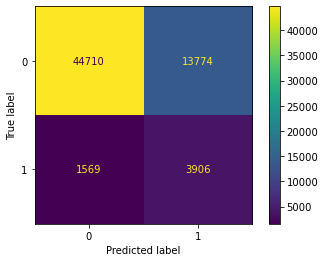

In [33]:
# refit the model with optimal hyper parameters
estimators = [
    ('scaling', StandardScaler()),
    ('reduce_dim', PCA(n_components=9)),
    ('model', LogisticRegression(penalty='l1', solver='liblinear'))
]

# instantiate pipeline with the specified steps
pipe = Pipeline(estimators)

pipe.fit(X_train_us, y_train_us)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(pipe,X_test, y_test)

In [34]:
# keep track of evaluation scores
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
accuracy.append(accuracy_score(y_test, y_pred))

**NOTE:**
- After grid search, the results seems pretty close to what we have got before
- It confirmed what I did before, PCA could not help to increase the score in this dataset
- Standard Scaling and Logistic Regression with default setting has the best performance

### Decision Tree
<a id='f'></a>

After trying logistic regression, I am curious how other classification models performed in this dataset

In [35]:
from sklearn.tree import DecisionTreeClassifier

estimators = [
    ('scale', StandardScaler()),
    ('dt', DecisionTreeClassifier()) 
]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('dt', DecisionTreeClassifier())])

              precision    recall  f1-score   support

           0       0.95      0.68      0.79     58484
           1       0.16      0.66      0.26      5475

    accuracy                           0.67     63959
   macro avg       0.56      0.67      0.52     63959
weighted avg       0.89      0.67      0.75     63959



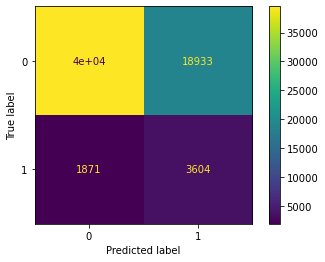

In [36]:
pipe.fit(X_train_us, y_train_us)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(pipe,X_test, y_test)

In [37]:
# keep track of evaluation scores
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
accuracy.append(accuracy_score(y_test, y_pred))

**Note:**
- Overall, accuracy increased, but recall is not as good as logistic regression

### Random Forest
<a id='f'></a>

 Next, Random Forest will be tried because this model normally give us better performance when features are a lot. 

In [38]:
from sklearn.ensemble import RandomForestClassifier

estimators = [
    ('scale', StandardScaler()),
    ('rf', RandomForestClassifier()) 
]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('rf', RandomForestClassifier())])

              precision    recall  f1-score   support

           0       0.94      0.89      0.91     58484
           1       0.23      0.34      0.28      5475

    accuracy                           0.85     63959
   macro avg       0.58      0.62      0.60     63959
weighted avg       0.88      0.85      0.86     63959



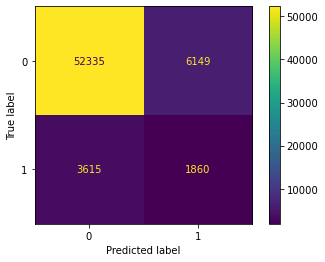

In [39]:
pipe.fit(X_train_sm, y_train_sm)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(pipe,X_test, y_test)

In [40]:
# keep track of evaluation scores
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
accuracy.append(accuracy_score(y_test, y_pred))

**NOTE:**
- Slightly better performance compared to Decision Tree, but still not as good as logistic regression in terms of recall score

### K Nearest Neighbours
<a id='g'></a>

In [41]:
from sklearn.neighbors import KNeighborsClassifier

estimators = [
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier()) 
]

pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('knn', KNeighborsClassifier())])

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     58484
           1       0.20      0.47      0.28      5475

    accuracy                           0.79     63959
   macro avg       0.57      0.64      0.58     63959
weighted avg       0.88      0.79      0.83     63959



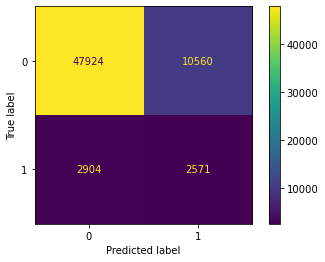

In [42]:
pipe.fit(X_train_sm, y_train_sm)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(pipe,X_test, y_test)

In [43]:
# keep track of evaluation scores
precision.append(precision_score(y_test, y_pred))
recall.append(recall_score(y_test, y_pred))
f1.append(f1_score(y_test, y_pred))
accuracy.append(accuracy_score(y_test, y_pred))

**NOTE:**
- Similar to tree methods, but lower accuracy score
- Not recommend run KNN because it takes pretty long time to run

# Summarize Evaluation Scores
<a id='sum'></a>

In [44]:
# put everything into a dictionary then convert to a dataframe
evaluation_dic = {'Precision':precision, 'Recall':recall, 'F1':f1,'Accuracy':accuracy}
evaluation_df = pd.DataFrame(evaluation_dic)

In [45]:
# set up labels
evaluation_df['Model'] = ['LOG','LOG+PCA','LOG+SMOTE','LOG+UNDERSAMPLING','LOG+UNDERSAMPLING+GRIDSEARCH','DECISION TREE','RANDOM FOREST','KNN']

In [46]:
# reset index using model names
evaluation_df = evaluation_df.set_index('Model')
evaluation_df


,Precision,Recall,F1,Accuracy
Model,,,,
LOG,0.564559,0.115799,0.192179,0.916665
LOG+PCA,0.504950,0.093151,0.157286,0.914555
LOG+SMOTE,0.220747,0.577169,0.319353,0.789396
LOG+UNDERSAMPLING,0.220706,0.768219,0.342899,0.747964
LOG+UNDERSAMPLING+GRIDSEARCH,0.220928,0.713425,0.337379,0.760112
DECISION TREE,0.159915,0.658265,0.257318,0.674729
RANDOM FOREST,0.232239,0.339726,0.275883,0.847340
KNN,0.195796,0.469589,0.276362,0.789490


In [47]:
# select the ones that will be used in presentation
selected_df = evaluation_df.iloc[[0,2,3,5,6,7],:]

Text(0, 0.5, 'Models')

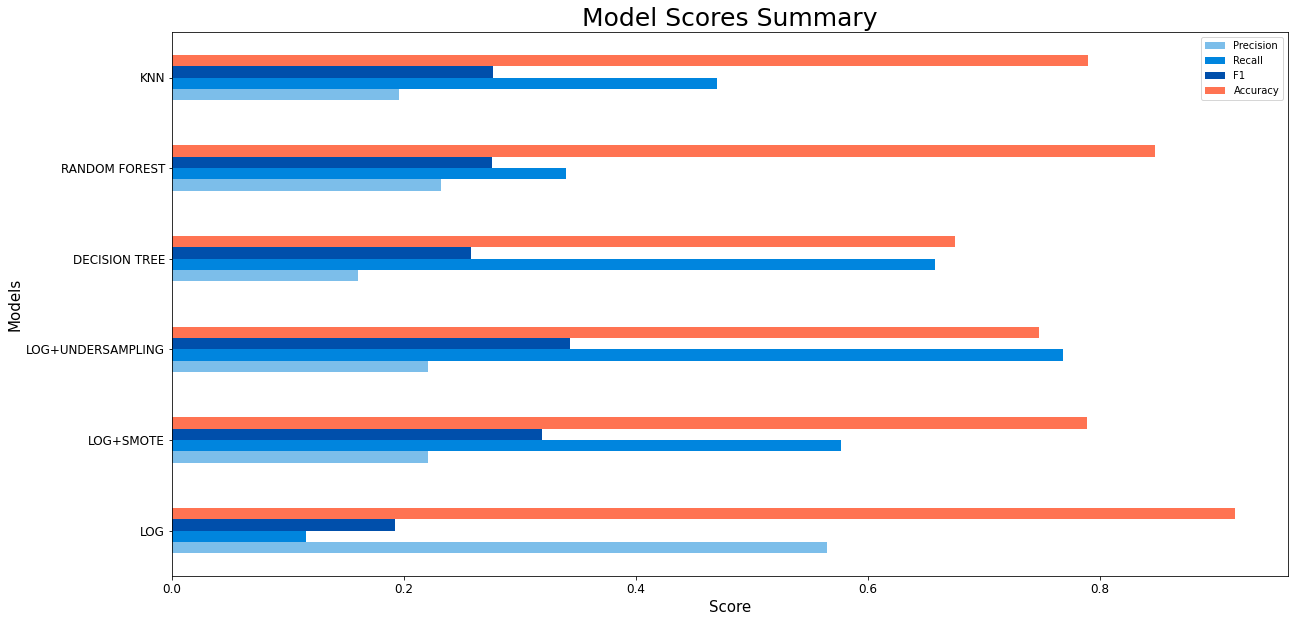

In [48]:
# show the plot
color=['#7cbeeaff','#0085deff','#004fabff','#ff7352ff']
selected_df.plot(kind='barh',figsize=(20,10), color=color, fontsize=12)
plt.title('Model Scores Summary', fontsize=25)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Models', fontsize=15)


**Conclusion:**

In this notebook, I first split training and testing dataset before fitting the models. Then Logistic Regression was first tried on the training dataset, and get high accuracy score but low recall score. Since the dataset is highly imbalanced, which could be the reason why the basic model has super low recall score. 

In next step, different sampling techniques have been tried on the original dataset. SMOTE (over sampling) and Random Under Sampler (under sampling) was applied separately. It turns out that Under Sampling gave us a better recall score but also sacrifice the accuracy score. In this case particularly, I value high recall score more because I hope to decrease false negative as much as possible. People who have high possibility of getting heart disease should be a bigger concern, so that they can take some actions to prevent the disease happening.

Additionally, I tried to optimize the hyper parameters for the optimal logistic regression model in order to achieve a better F1 score, and the scores are pretty close to the basic model. Therefore, considering of the running time and complexity, I choose Logistic Regression + Under Sampling as the best model for this project.

Furthermore, other classification models have been tried, e.g. Decision Tree, Random Forest, and K Nearest Neighbours. Overall, these models gave us a better accuracy score compared to previous logistic model with sampling technique, but the F1 score were not as high as previous model.

Another reason I choose Logistic Regression as final model is that only Logistic Regression can give us certain information about actual correlation with our target variable. I hope to find the key indicators of getting heart disease, so this model is the best one to use in this project. 

In summary, top 5 features that could predict heart disease are:
1. Age
2. Stroke
3. Diabetic
4. Smoking
5. Kidney Disease

**Next Steps**
- Take a closer look of multicollinearity of each feature in order to get more accuracy coefficient
- Check original dataset, and add more useful features
- Find more balanced datasets with equal amount of patient with heat disease or not, and re-run the model to check the scores